In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def f(x):
    return 3*x**2+4*x-5

In [3]:
f(3.0)

34.0

In [4]:
xs= np.arange(-5,5,0.25)
ys= f(xs)
print(ys)
print(xs)

[50.     43.6875 37.75   32.1875 27.     22.1875 17.75   13.6875 10.
  6.6875  3.75    1.1875 -1.     -2.8125 -4.25   -5.3125 -6.     -6.3125
 -6.25   -5.8125 -5.     -3.8125 -2.25   -0.3125  2.      4.6875  7.75
 11.1875 15.     19.1875 23.75   28.6875 34.     39.6875 45.75   52.1875
 59.     66.1875 73.75   81.6875]
[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


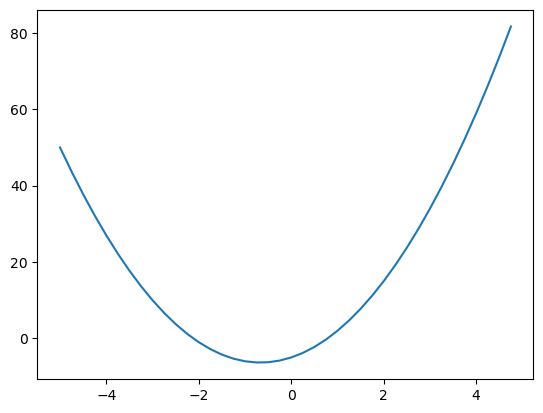

In [5]:
plt.plot(xs,ys);

In [6]:
h=0.000000000001
x=3.0
f(x),f(x+h), f(x+h)-f(x), (f(x+h)-f(x))/h

(34.0, 34.000000000022, 2.1998403099132702e-11, 21.9984030991327)

In [7]:
a= 2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [8]:
h=0.0001

#input
a=2.0
b=-3.0
c=10

# here the function has three variables, and in this case we wanna find the derivative of function respect to 'a'
d1=a*b+c
a+=h
d2=a*b+c

print('d1:', d1)
print('d2:', d2)
print('slop:', (d2-d1)/h)

d1: 4.0
d2: 3.999699999999999
slop: -3.000000000010772


In [9]:
# derivative respect to 'b'
d1=a*b+c
b+=h
d3=a*b+c

print('d1:', d1)
print('d3:', d2)
print('slop:', (d3-d1)/h)

d1: 3.999699999999999
d3: 3.999699999999999
slop: 2.0001000000124947


In [10]:
# derivative respect to 'c'
d1=a*b+c
c+=h
d4=a*b+c

print('d1:', d1)
print('d3:', d4)
print('slop:', (d4-d1)/h)

d1: 3.99990001
d3: 4.00000001
slop: 0.9999999999976694


In [112]:
!pip install graphviz

In [12]:
!pip show graphviz

Name: graphviz
Version: 0.20.3
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: /Users/hivagheisari/Desktop/sample_project/env/lib/python3.12/site-packages
Requires: 
Required-by: 


In [2]:
import graphviz
from graphviz import Digraph

#help(graphviz)

In [2]:
import graphviz
print(graphviz.__file__)  # Path to the Python package


/Users/hivagheisari/Desktop/sample_project/env/lib/python3.12/site-packages/graphviz/__init__.py


In [26]:
import os
os.environ["PATH"] += os.pathsep + r"/Users/hivagheisari/Desktop/sample_project/env/lib"  # Replace with actual path


In [27]:
!echo $PATH 

/Users/hivagheisari/Desktop/sample_project/env/bin:/opt/miniconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Users/hivagheisari/Desktop/sample_project/env/lib/python3.12/site-packages/graphviz/__init__.py:/Users/hivagheisari/Desktop/sample_project/env/lib


In [4]:
from graphviz import Digraph

dot = Digraph()
dot.node('A', 'Start')
dot.node('B', 'End')
dot.edge('A', 'B', 'Path')
dot.render('test-output', format='png', cleanup=True)


'test-output.png'

In [4]:
import graphviz
from graphviz import Digraph

print(graphviz.__file__)  # Path to the Python graphviz package
!where dot               # Verify dot executable location (Windows)
!which dot               # Verify dot executable location (Linux/Mac)


/Users/hivagheisari/Desktop/sample_project/env/lib/python3.12/site-packages/graphviz/__init__.py
/opt/homebrew/bin/dot
/opt/homebrew/bin/dot


## **Micrograd**

In [2]:
class Value:

    def __init__(self,data, _children=(), _op='', label=''): #children are for the initial nodes, #op is for operations # label for labeling the nodes
        self.data = data
        self.grad = 0.0 # the gradient
        self._backward = lambda: None # the empty function, we use it to do the backward gradient in the neural network instead do it manually
        self._prev = set(_children) # set format: we used the set just for efficency
        self._op = _op  #op is for operations
        self.label = label  # label for labeling the nodes
        

    def __repr__(self):             # providing us a way to print out like a nicer looking expression in pyhton
        return f"Value(data={self.data})"

    

    def __add__(self,other):   # this is what happen in the background of addition in python 
        other = other if isinstance(other, Value) else Value(other) # we add it to wrape the number in value
        out = Value(self.data + other.data, (self,other), '+')
        def _backward():
            self.grad += 1.0 * out.grad # do/d self= do/ out * d out/d self
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out

    def __neg__(self): # self - other
        return self * -1


    def __sub__(self,other):
        out = self + (- other)
        #other = other if isinstance(other, Value) else Value(other)
        #out = Value(self.data + (other * -1).data, (self, other), '-') # he wrote it in the form of, without 'out' and just return self+ (-other) 
        return out


    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self,other),'*')
        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward
            
        return out

    def __pow__(self,other): 
        assert isinstance(other, (int, float)), 'only supporting int/float powers for now'
        out = Value(self.data**other, (self,), f'**{other}')
        
        def _backward():
            self.grad += other * self.data **(other-1) * out.grad
        out._backward = _backward
            
        return out



    def __rmul__(self,other): # other*self # here we checking the posiiblity of the commuting multiplication of variables
        return self * other   



    def __truediv__(self, other): # self/other
        return self*other**-1
    
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += out.grad * (1-t**2) # (tanh)' = 1- tanh^2
        out._backward = _backward

        return out


    def exp(self):
        x= self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        
        return out


    

    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad=1
        for node in reversed(topo):
            node._backward()



In [324]:
a-b # need to define subtraction

TypeError: unsupported operand type(s) for -: 'Value' and 'Value'

In [334]:
a= Value(2.0)
b= Value(1.0)
a-b

Value(data=1.0)

In [328]:
a= Value(2.0)
b= Value(1.0)
a**2

Value(data=4.0)

In [318]:
a**b

AssertionError: only supporting int/float powers for now

In [306]:
a= Value(2.0)
b= Value(4.0)
a/b

Value(data=0.5)

In [ ]:
# we can rewrite the division in the form of mltiplication
a/b= a*(1/b)= a* (b**-1)
# so we need implication for the form of x**k

In [299]:
a= Value(2.0)
a.exp()

Value(data=7.38905609893065)

In [283]:
a= Value(8.0)
1
a+1 # the integer does not have an attribute data so we need to fix it in the class

AttributeError: 'int' object has no attribute 'data'

In [289]:
a*2

Value(data=16.0)

In [274]:
a.tanh()

Value(data=0.9999997749296758)

In [285]:
a*2

Value(data=16.0)

* python des not understand the commute operations for example it thinks 2*a is difference of a*2!
    - a = Value(8.0)
    - `2*a = 2.__mul__(a)`
    - `a*2 = a.__mul__(2)`

In [286]:
2*a

TypeError: unsupported operand type(s) for *: 'int' and 'Value'

In [287]:
2*a

TypeError: unsupported operand type(s) for *: 'int' and 'Value'

In [294]:
c = a.exp()
c

In [292]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e+c; d.label='d'
f = Value(-2.0, label='f')
L = f*d; L.label='L'
print(f" the value of a,b,c are: {a,b,c}\n the value of addition is: {a+b}\n the value of product is:{e}\n the value of d is: {d}\n the value of d._prev is: {d._prev}\n the value of d._op is :{d._op}" )  # the ting happen here is (a.__mul__(b)).__add__(c)

 the value of a,b,c are: (Value(data=2.0), Value(data=-3.0), Value(data=10.0))
 the value of addition is: Value(data=-1.0)
 the value of product is:Value(data=-6.0)
 the value of d is: Value(data=4.0)
 the value of d._prev is: {Value(data=10.0), Value(data=-6.0)}
 the value of d._op is :+


In [4]:
from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)

    build(root)
    return nodes, edges 

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) #LR= left to right
    nodes,edges = trace(root)
    for n in nodes:
        uid=str(id(n))
        # for any value in the graph, create a rectaangular('record') node fro it
        dot.node(name= uid, label="{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid+n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2))+n2._op)
    return dot    

In [177]:
trace(a)

({Value(data=2.0)}, set())

In [79]:
trace(d)

({Value(data=-3.0),
  Value(data=-6.0),
  Value(data=10.0),
  Value(data=2.0),
  Value(data=4.0)},
 {(Value(data=-3.0), Value(data=-6.0)),
  (Value(data=-6.0), Value(data=4.0)),
  (Value(data=10.0), Value(data=4.0)),
  (Value(data=2.0), Value(data=-6.0))})

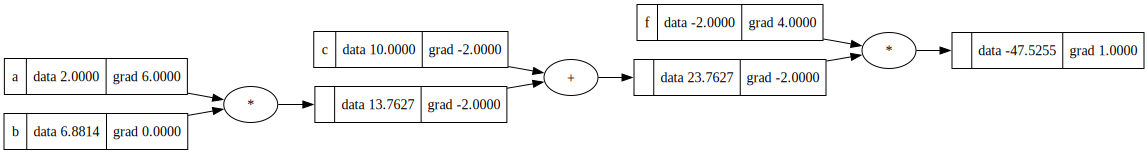

In [167]:
draw_dot(L)

In [166]:
L.grad =1 # we put in manually
# dL/dd = d(L=f*d)= dd= f
f.grad= 4.0
d.grad=-2.0
# dL/dc=dL/dd * dd/dc / we know dd/dc=1 since d=a*b+c so we have dL/dc=dL/dd=-2
c.grad = -2.0
# dL/de=dL/dd * dd/de / e know dd/de=1 since d=e+c so we have dL/dc=dL/dd=-2
e.grad = -2.0
b.grad= 4.0
a.grad = 6.0


In [149]:
# get together for tidiness
# this is the derivetve of L respect to a
def lol():

    h=0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f = Value(-2.0, label='f')
    L = f*d; L.label='L'
    L1 = L.data  #Convert a string or number to a floating-point number, if possible.

    a = Value(2.0+h, label='a') # or a.data+=h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f = Value(-2.0, label='f')
    L = f*d; L.label='L'
    L2 = L.data
    print((L2-L1)/h)

lol()

6.000000000021544


In [150]:
# checking how the gradient of variables affect on L
a.data +=0.01* a.grad
b.data +=0.01* b.grad
c.data +=0.01* c.grad
f.data +=0.01* f.grad

e=a*b
d=e+c
L=f*d

print(L.data)

-47.52549434807817


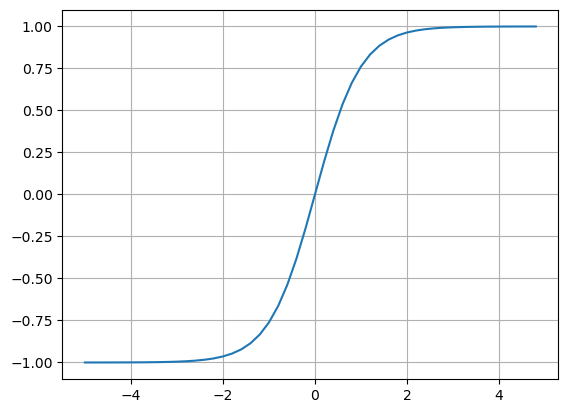

In [151]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)));
plt.grid();

In [248]:
# inputs x1,x2
x1= Value(2.0, label='x1')
x2= Value(0.0, label='x2')
# weights w1,w2
w1= Value(-3.0, label = 'w1')
w2= Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1_x2w2+b
x1w1= x1*w1; x1w1.label = 'x1*w1'
x2w2= x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2= x1w1+x2w2; x1w1x2w2.label ='x1w1x2w2'
n= x1w1x2w2+b; n.label ='n'
o= n.tanh(); o.label ='o'


#draw_dot(o) # if b = Value(8.0, label='b'):the final answer is close to 1 it means we approached to the tail of function

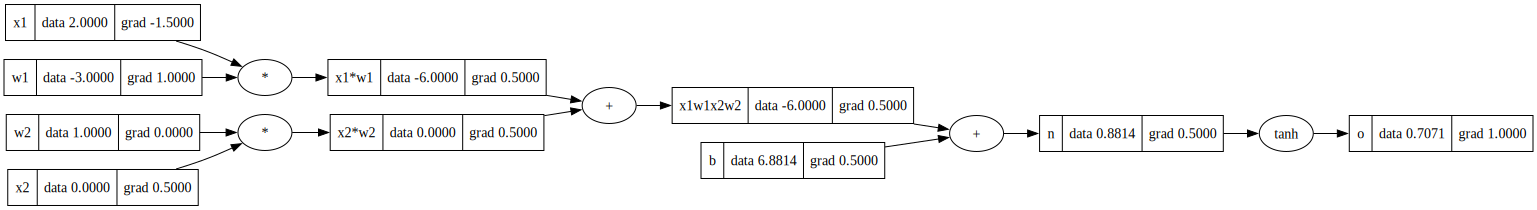

In [251]:
draw_dot(o)

In [250]:
o.backward()

* w2 does not affect since dw2=0.
* this ordering of graph gives us the topological sorting

In [232]:
o.grad=1 # we put it this one manually
o._backward() 
n._backward() 
b._backward() # b is a leave and does not have a backward but you can call it although it return nothing
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

In [243]:
# we set all the grad found to zero and wanna try to find it by build_top function:
o.grad=1
topo=[]
visited=set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
for node in reversed(topo):
    node._backward()

* here we just write the nodes in graph:

In [221]:
topo=[]
visited=set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append([v, v.label])

build_topo(o)
topo

[[Value(data=1.0), 'w2'],
 [Value(data=0.0), 'x2'],
 [Value(data=0.0), 'x2*w2'],
 [Value(data=-3.0), 'w1'],
 [Value(data=2.0), 'x1'],
 [Value(data=-6.0), 'x1*w1'],
 [Value(data=-6.0), 'x1w1x2w2'],
 [Value(data=6.881373587019543), 'b'],
 [Value(data=0.8813735870195432), 'n'],
 [Value(data=0.7071067811865476), 'o']]

* In the following codes we find the grad manually:

In [237]:
topo[:-1]

[[Value(data=1.0), 'w2'],
 [Value(data=0.0), 'x2'],
 [Value(data=0.0), 'x2*w2'],
 [Value(data=-3.0), 'w1'],
 [Value(data=2.0), 'x1'],
 [Value(data=-6.0), 'x1*w1'],
 [Value(data=-6.0), 'x1w1x2w2'],
 [Value(data=6.881373587019543), 'b'],
 [Value(data=0.8813735870195432), 'n']]

In [240]:
r = reversed(topo)

In [225]:
n.grad = 0.5
x1w1x2w2.grad=0.5 # when we reach to the + we can split to 2 !
b.grad=0.5
x1w1.grad=0.5
x2w2.grad=0.5

In [168]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [172]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [141]:
# o=tanh(n)
# do/dn= 1-o**2
o.data, 1-o.data**2

(0.7071067811865476, 0.4999999999999999)

* **since we do not wanna to laying around the build_topo function. we add it to class.**

## Bug:

* we encounter to this issue when we use the variables more than ones in the equations!
* for solving this issue we need to accumulate the gradients

* the grad in 'a' has to be 2 not one!

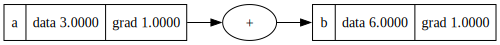

In [252]:
a = Value(3.0, label='a')
b = a+a ; b.label = 'b'
b.backward()
draw_dot(b)

* more complicated example:

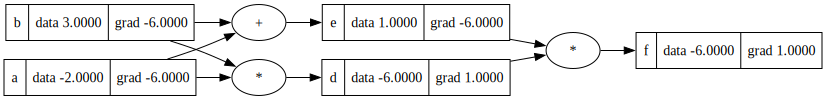

In [255]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')

d = a*b ; d.label = 'd'
e = a+b ; e.label = 'e'
f = d*e ; f.label = 'f'

f.backward()
draw_dot(f) # we have overwrite for the grad of a and b when we change from e to d! 

* in the following code we refine the bug!

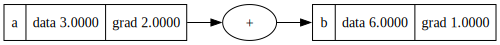

In [259]:
a = Value(3.0, label='a')
b = a+a ; b.label = 'b'
b.backward()
draw_dot(b)

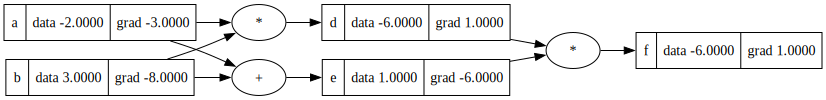

In [260]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')

d = a*b ; d.label = 'd'
e = a+b ; e.label = 'e'
f = d*e ; f.label = 'f'

f.backward()
draw_dot(f)

******

In [346]:
#%%time
# inputs x1,x2
x1= Value(2.0, label='x1')
x2= Value(0.0, label='x2')
# weights w1,w2
w1= Value(-3.0, label = 'w1')
w2= Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1_x2w2+b
x1w1= x1*w1; x1w1.label = 'x1*w1'
x2w2= x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2= x1w1+x2w2; x1w1x2w2.label ='x1w1x2w2'
n= x1w1x2w2+b; n.label ='n'
o= n.tanh(); o.label ='o'
o.backward()

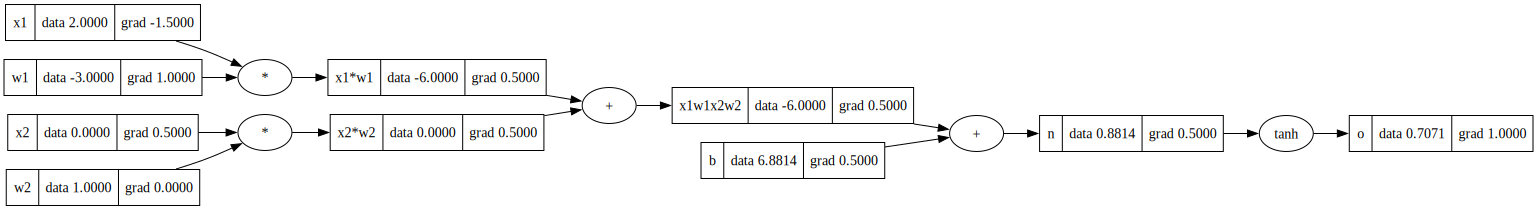

In [337]:
draw_dot(o)

In [360]:
#%%time
# here we wanna redefine 'tanh'

# inputs x1,x2
x1= Value(2.0, label='x1')
x2= Value(0.0, label='x2')
# weights w1,w2
w1= Value(-3.0, label = 'w1')
w2= Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1_x2w2+b
x1w1= x1*w1; x1w1.label = 'x1*w1'
x2w2= x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2= x1w1+x2w2; x1w1x2w2.label ='x1w1x2w2'
n= x1w1x2w2+b; n.label ='n'
# ----
e = (2*n).exp(); e.label = 'e'
e_1 = e-1; e_1.label = 'e-1'
e_2 = e+1; e_2.label = 'e+1'
o= e_1/e_2; o.label ='o'
# ----

o.backward()

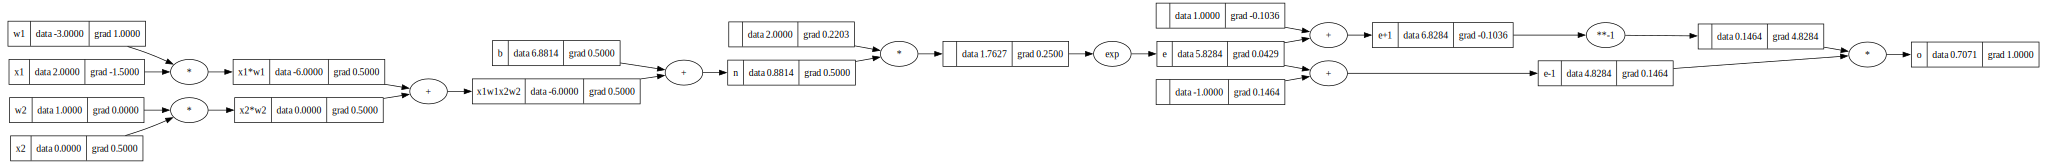

In [361]:
draw_dot(o)

In [356]:
e_1.grad

0.1464466094067262

In [357]:
e.grad

-0.10355339059327374

In [358]:
n.grad

-1.2071067811865477

# PyTorch:

* Here we see how we can do the exact same thing that we did by using a moder deep nural network library like PyTorch. So here we see how we can use the PyTorch API to produce the neural network.

In [364]:
pip install torch

  Using cached torch-2.2.2-cp312-none-macosx_10_9_x86_64.whl.metadata (25 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.2.2-cp312-none-macosx_10_9_x86_64.whl (150.8 MB)
Using cached fsspec-2024.12.0-py3-none-any.whl (183 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached sympy-1.13.3-py3-none-any.whl (6.2 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch

x1 = torch.tensor([1.2,3])
x1, x1.dtype

(tensor([1.2000, 3.0000]), torch.float32)

In [385]:
x2 = torch.Tensor([1.2,3])
x2, x2.dtype

(tensor([1.2000, 3.0000]), torch.float32)

In [388]:
x3 = x2.double() #``self.double()`` is equivalent to ``self.to(torch.float64)``.
x3

tensor([1.2000, 3.0000], dtype=torch.float64)

In [389]:
x3.dtype

torch.float64

In [375]:
torch.Tensor([[1,2,3],[4,5,6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

- **we use .double() just to casting all we have to the unique format.**

- **the leaves in pytorch as a defult doen not need the gradient but we need them so we put `x1.requires_grad` equal to `True`. x1,x2,w1,w2,b are leaf.**

- pytorch has the attribute .data and .tanh()!

In [6]:
x1 = torch.Tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double() ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double() ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double() ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double() ; b.requires_grad = True
n = x1*w1+x2*w2+b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('-----')
print('x2', x2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())
print('w2', w2.grad.item())

0.7071066904050358
-----
x2 0.5000001283844369
x1 -1.5000003851533106
w1 1.0000002567688737
w2 0.0


In [394]:
print(f'{o.data},\n {o.data.item()}, \n {o.item()}')

 tensor([0.7071], dtype=torch.float64),
 0.7071066904050358, 
 0.7071066904050358


In [395]:
x2.grad # it's double: dtype=torch.float64

tensor([0.5000], dtype=torch.float64)

In [396]:
x2.grad.item()

0.5000001283844369

In [403]:
# list(zip([1,2],[5,7]))

In [406]:
# i*j : 5,14
# for i,j in zip([1,2],[5,7]):
#     print(i*j)

In [7]:
import random

In [8]:
class Neuron:

    def __init__(self, nin): #nin: the number of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        # w * x +b
        act = sum(( wi*xi for wi, xi in zip(self.w,x)), self.b) # sum(wi*xi for wi, xi in zip(self.w,x))= sum((wi*xi for wi, xi in zip(self.w,x)),0.0)
        out = act.tanh()
        #print(list(zip(self.w,x)))
        return out

class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self,x):
        outs = [n(x) for n in self.neurons] 
        return outs[0] if len(outs)==1 else outs # for convenience instead of just `return outs` when len(outs)==1 we just need the first element of list

class MLP:

    def __init__(self, nin, nouts): # nouts is the list of nout, means is the size of all the layers we want
        sz = [nin]+ nouts
        self.layers =[Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [568]:
[2]+[1,2,3]

[2, 1, 2, 3]

In [569]:
x = [2.0,3.0]
n = Neuron(2)
n(x)

Value(data=0.8960178085828042)

In [570]:
a = Neuron(4)([1,2,3,4])
a

Value(data=-0.9919650886342212)

In [571]:
x[0]

2.0

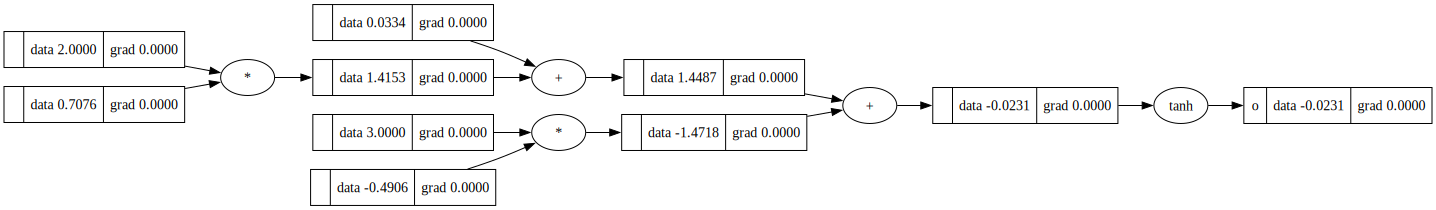

In [572]:
x = [2.0,3.0]
n = Neuron(2)
o = n(x) ; o.label='o'
draw_dot(o)

In [573]:
[Neuron(2)(x) for _ in range(3)]

[Value(data=0.05714832281187443),
 Value(data=0.9865525839412492),
 Value(data=0.9985527931758627)]

In [574]:
neurons = [Neuron(2) for _ in range(3)]
outs = [n(x) for n in neurons]
outs

[Value(data=0.43078884026723346),
 Value(data=-0.998676154798868),
 Value(data=-0.9994730310565954)]

In [575]:
b = Layer(2,3)(x)
b

[Value(data=0.5732622966054911),
 Value(data=-0.9977268339180958),
 Value(data=-0.8436926412651381)]

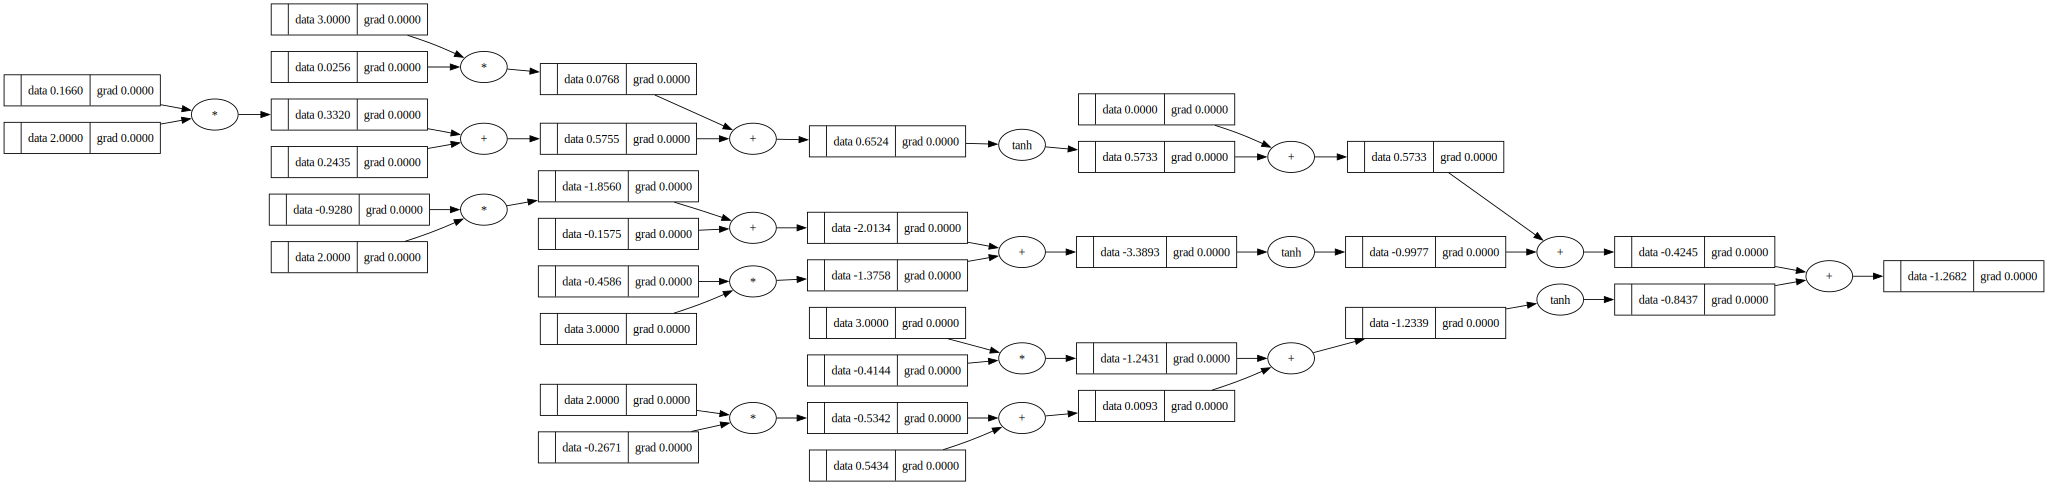

In [576]:
draw_dot(sum(b, Value(0.0)))

In [577]:
sz= [2]+[2,3]
layers =[Layer(sz[i], sz[i+1]) for i in range(len([2,3]))]
for lay in layers:
    x = lay(x)
x, sz

([Value(data=0.8161860688837688),
  Value(data=0.7319887826048486),
  Value(data=-0.6691310203877486)],
 [2, 2, 3])

In [597]:
x = [2.0, 3.0]
c = MLP(2,[2,2,1]) # Layer(2,2)(x), Layer(2,3)(x)
c(x)

Value(data=0.49228598267434287)

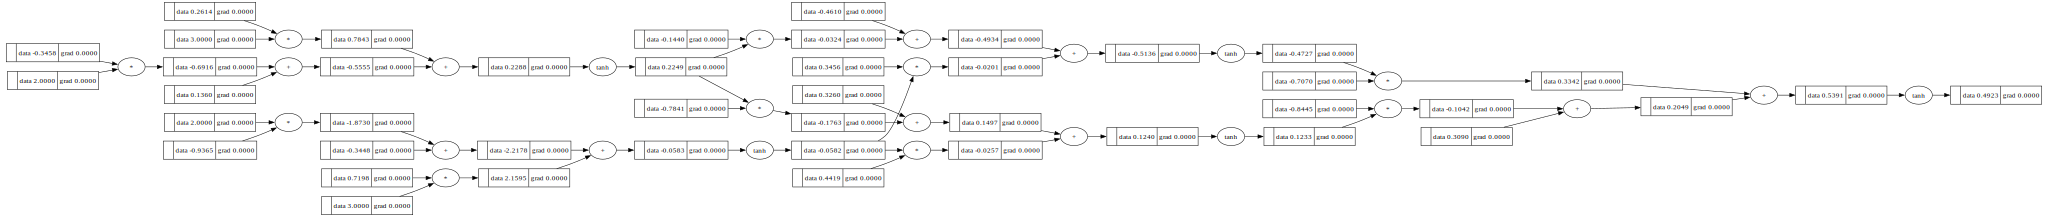

In [598]:
draw_dot(c(x))

In [489]:
# w = [Value(random.uniform(-1,1)) for _ in range(3)]
# w

In [490]:
# x = [1,2,3]
# x

In [491]:
# list(zip(w,x))

In [492]:
# S= [wi*xi for wi, xi in zip(w,x) ]
# S

In [493]:
# sum_=Value(0.0)
# for s in S:
#     sum_+=s
# print(sum_)

In [478]:
#sum([1,2]): 3

In [494]:
# sum(S,Value(0.0))

In [599]:
x = [2.0,3.0,-1.0]
n = MLP(3,[4,4,1])
n(x)

Value(data=0.891896176279083)

In [601]:
# we have 4 examples in xs and we can consider that each row corresponds to the element of ys
xs = [
    [2.0,3.0,-1.0], #1.0
    [3.0,-1.0,0.5], #-1.0
    [0.5,1.0,1.0], #-1.0
    [1.0,1.0,-1.0] #1.0
                   ]

ys =[1.0,-1.0,-1.0,1.0] #desired targets
ypred= [n(x) for x in xs]
ypred

[Value(data=0.891896176279083),
 Value(data=0.6559222703324529),
 Value(data=0.8179339054955492),
 Value(data=0.8663930414824201)]

* So here we wanna the first be 1.0 but we have 0.89 so we need to push it a little. Or for the second one we need -1.0 but we have 0.65 and we need to push this down!
* Now, how we tune the weights to better predict.
* if loss be min then each term of summation are min and means it close to the real value. 

In [645]:
# measure how the neural netweok performing by using the loss   
loss= sum([(yout-ygt)**2 for ygt,yout in zip(ys_new,ypred)], Value(0.0))
loss

Value(data=6.076499506200687)

In [646]:
loss.backward()

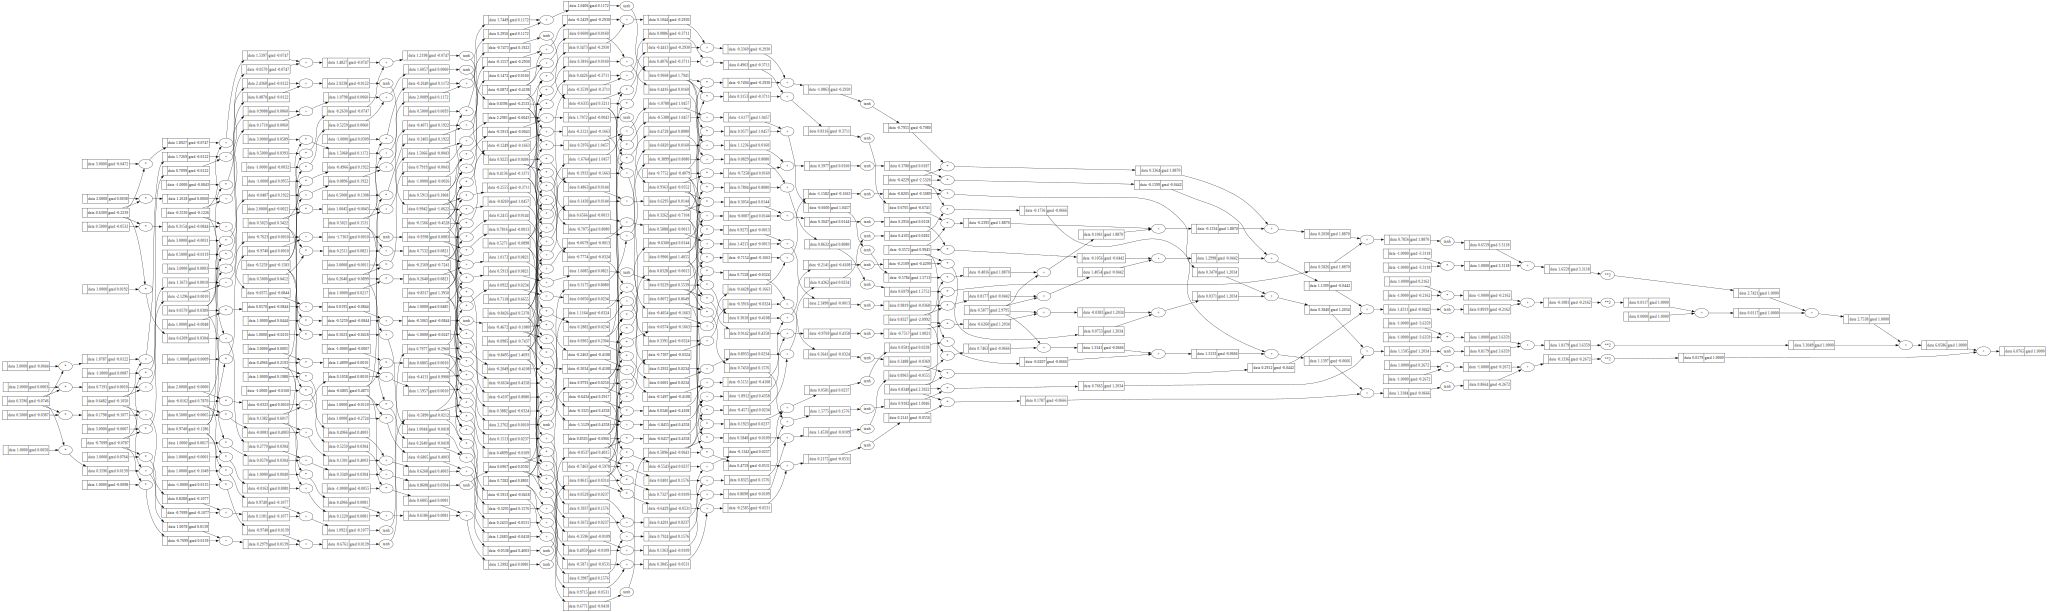

In [655]:
draw_dot(loss)

In [653]:
First_weight= n.layers[0].neurons[0].w[0]
First_weight

Value(data=0.3595743006565102)

In [654]:
First_weight.grad 
# this shows increasing in the node w[0] decrease the loss.

-0.07461450935978169

In [9]:
class Neuron:

    def __init__(self, nin): #nin: the number of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        # w * x +b
        act = sum(( wi*xi for wi, xi in zip(self.w,x)), self.b) # sum(wi*xi for wi, xi in zip(self.w,x))= sum((wi*xi for wi, xi in zip(self.w,x)),0.0)
        out = act.tanh()
        #print(list(zip(self.w,x)))
        return out

    def parameters(self):
        return self.w+[self.b]

class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self,x):
        outs = [n(x) for n in self.neurons] 
        return outs[0] if len(outs)==1 else outs # for convenience instead of just `return outs` when len(outs)==1 we just need the first element of list

    def parameters(self):
        params=[]
        for neuron in self.neurons:
            ps=neuron.parameters()
            params.extend(ps)
        return params # squizing all is : return [p for neuron in self.neurons for p in ps=neuron.parameters()]


class MLP:

    def __init__(self, nin, nouts): # nouts is the list of nout, means is the size of all the layers we want
        sz = [nin]+ nouts
        self.layers =[Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [10]:
x = [2.0,3.0,-1.0]
n = MLP(3,[4,4,1])
n(x)

Value(data=-0.9113313208734517)

In [11]:
n.parameters(), len(n.parameters())

([Value(data=-0.4425867418515561),
  Value(data=0.2605983336369939),
  Value(data=-0.666871875962274),
  Value(data=0.2979479185326901),
  Value(data=-0.3297729608059101),
  Value(data=0.6442876373213218),
  Value(data=0.8750419170144512),
  Value(data=-0.7411916448768021),
  Value(data=-0.8785447263710506),
  Value(data=-0.38691806757717706),
  Value(data=0.17754518477128411),
  Value(data=-0.9738163370199833),
  Value(data=0.9618559359439871),
  Value(data=-0.532979194266127),
  Value(data=-0.7623722469312897),
  Value(data=-0.20217424094806602),
  Value(data=0.07988237820582689),
  Value(data=-0.25733011276126105),
  Value(data=-0.27728365677678335),
  Value(data=-0.051758847669239216),
  Value(data=-0.17026415502325198),
  Value(data=0.5156813779339684),
  Value(data=-0.7583788953612682),
  Value(data=-0.5318475456820086),
  Value(data=-0.3212267723314517),
  Value(data=-0.9857051926533555),
  Value(data=-0.7827920866865166),
  Value(data=0.9232691874841406),
  Value(data=0.7251208

In [12]:
xs = [
    [2.0,3.0,-1.0], #1.0
    [3.0,-1.0,0.5], #-1.0
    [0.5,1.0,1.0], #-1.0
    [1.0,1.0,-1.0] #1.0
                   ]

ys =[1.0,-1.0,-1.0,1.0] #desired targets
ypred= [n(x) for x in xs]
ypred

[Value(data=-0.9113313208734517),
 Value(data=-0.8010393673301041),
 Value(data=0.1043101855132406),
 Value(data=-0.8775212820582282)]

### **we're aming to minimize the loss**

- loss is the accuracy of the predictions

In [14]:
loss= sum([(yout-ygt)**2 for ygt,yout in zip(ys,ypred)], Value(0.0))
loss

Value(data=8.43735990191412)

In [15]:
loss.backward()

In [16]:
w1 = n.layers[0].neurons[0].w[0]
w1g = n.layers[0].neurons[0].w[0].grad
w1d = n.layers[0].neurons[0].w[0].data
w1, w1g, w1d

(Value(data=-0.4425867418515561), -0.12316645207820484, -0.4425867418515561)

In [17]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [18]:
n.layers[0].neurons[0].w[0].data

-0.44135507733077406

In [20]:
#1
ypred= [n(x) for x in xs]
loss= sum([(yout-ygt)**2 for ygt,yout in zip(ys,ypred)], Value(0.0))
loss

Value(data=8.145472080481111)

In [21]:
#2
loss.backward()

In [22]:
#3
for p in n.parameters():
    p.data += -0.01 * p.grad

- **gradint descent is doing recursively #1#2#3.**

In [23]:
ypred

[Value(data=-0.8991663389195285),
 Value(data=-0.8013952069882075),
 Value(data=0.016666084164060777),
 Value(data=-0.8616083119441008)]

In [24]:
ys

[1.0, -1.0, -1.0, 1.0]

- **these are the parameters we find for optimizing.**

In [25]:
n.parameters()

[Value(data=-0.43880847826066793),
 Value(data=0.26819364637738036),
 Value(data=-0.6529643640495034),
 Value(data=0.3082539830760952),
 Value(data=-0.34592059709372497),
 Value(data=0.6207971631601927),
 Value(data=0.8813675443852281),
 Value(data=-0.7524813154998817),
 Value(data=-0.8789533023481423),
 Value(data=-0.38742453046974296),
 Value(data=0.1777223390260965),
 Value(data=-0.9743008137737059),
 Value(data=0.9491783223902049),
 Value(data=-0.5468599474929402),
 Value(data=-0.741008029340434),
 Value(data=-0.20431057514258655),
 Value(data=0.0975828660253207),
 Value(data=-0.276731783640676),
 Value(data=-0.27053013617680427),
 Value(data=-0.02615717341555267),
 Value(data=-0.17849147366115245),
 Value(data=0.5397780286821832),
 Value(data=-0.7822906750002208),
 Value(data=-0.5368525794122495),
 Value(data=-0.29063225352967503),
 Value(data=-0.9819024504361056),
 Value(data=-0.7691028989741667),
 Value(data=0.9081874532347569),
 Value(data=0.745036815452501),
 Value(data=-0.412

- **get together:**

In [26]:
xs = [
    [2.0,3.0,-1.0], #1.0
    [3.0,-1.0,0.5], #-1.0
    [0.5,1.0,1.0], #-1.0
    [1.0,1.0,-1.0] #1.0
                   ]

ys =[1.0,-1.0,-1.0,1.0] #desired targets

In [40]:
for k in range(20):

    #forward pass
    ypred = [n(x) for x in xs]
    loss= sum([(yout-ygt)**2 for ygt,yout in zip(ys,ypred)], Value(0.0))

    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    # update, we get step here 0.05
    for p in n.parameters():
        p.data += -0.01 * p.grad
        
    print(k, loss.data)

0 0.048611152470837776
1 0.04809482875449524
2 0.047588546755354136
3 0.04709202668337166
4 0.04660499882472341
5 0.04612720309891299
6 0.04565838863878518
7 0.04519831339208128
8 0.04474674374327317
9 0.044303454154488636
10 0.04386822682442489
11 0.04344085136421557
12 0.04302112448928407
13 0.04260884972627953
14 0.042203837134247
15 0.041805903039239846
16 0.041414869781628935
17 0.041030565475412846
18 0.04065282377887377
19 0.040281483675966095


In [41]:
ypred

[Value(data=0.9138872622495625),
 Value(data=-0.8850259925996442),
 Value(data=-0.9224689861874411),
 Value(data=0.8832267171284878)]